# Многозадачность

In [ ]:
import time

## Закон Амдала

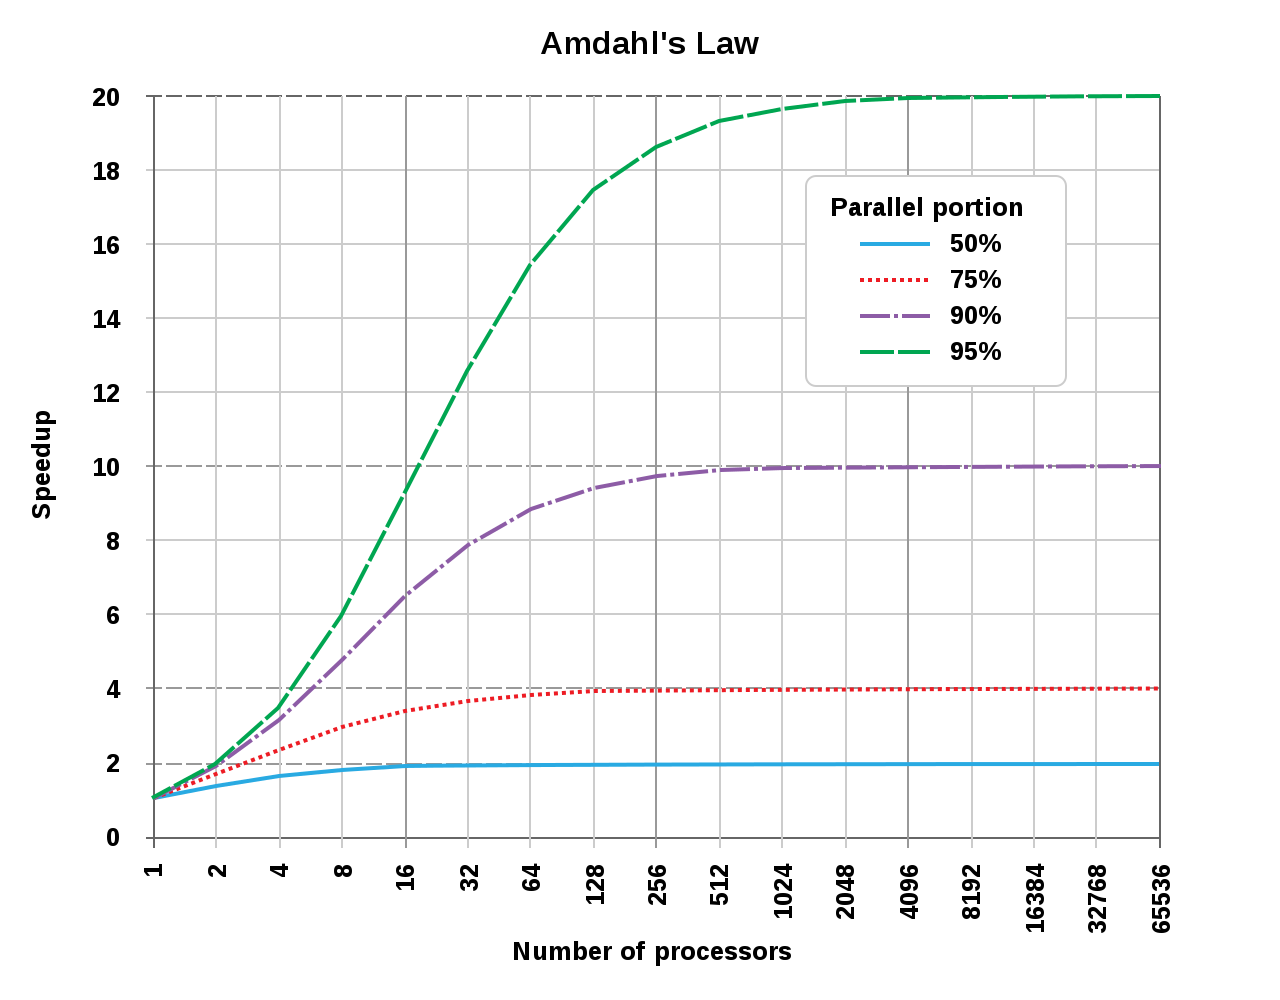

## Конкурентность

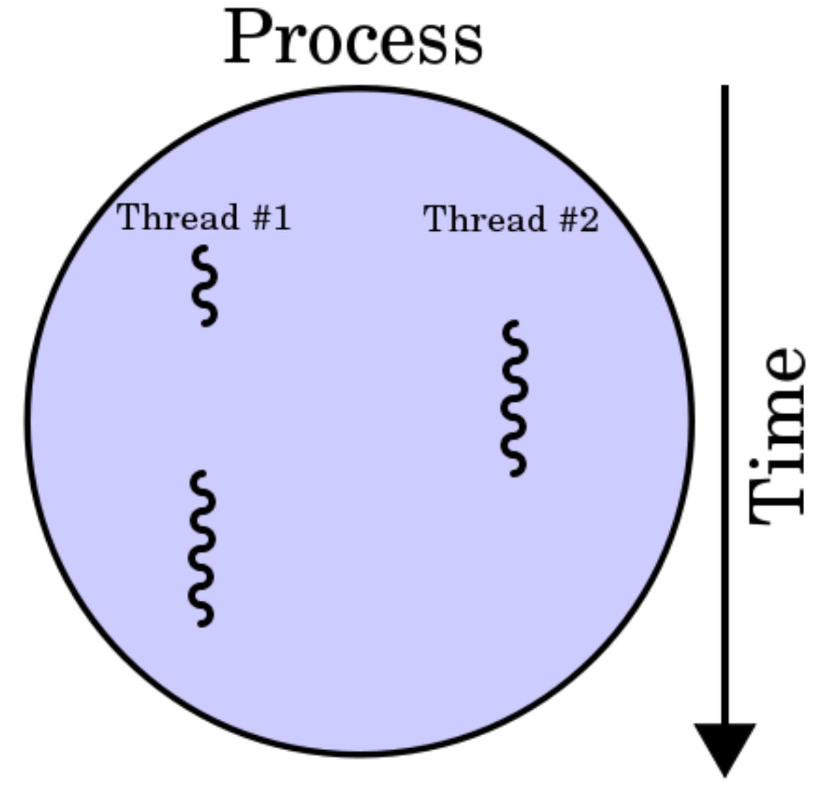

## Процессы

Классом, который отвечает за создание и управление процессами является `Process` из пакета `multiprocessing`

In [ ]:
from multiprocessing import Process

In [ ]:
def say_hello(name):
    time.sleep(5)
    print(f"Hello, {name}!")

In [ ]:
# создание объектка процесса
p = Process(target=say_hello, args=("AI student",))

# запуск процесса
p.start()
print("Выполняется некоторый процесс.. ")

# ожидание выполнения процесса
p.join()

print("Конец!")

### Взаимодействие с процессом

In [ ]:
from multiprocessing import Process, current_process

In [ ]:
def custom_func():
    proc_name = current_process().name
    proc_pid = current_process().pid
    print(f"Запустился процесс {proc_name}[{proc_pid}]")
    time.sleep(2)
    print(f"Завершился процесс {proc_name}[{proc_pid}]")

In [ ]:
p1 = Process(name="Job-1", target=custom_func)
proc_pid = p1.pid
proc_status = p1.is_alive()
print(f"Процесс с pid[{proc_pid}] работает[{proc_status}]")

p1.start()
proc_status = p1.is_alive()
proc_pid = p1.pid
print(f"Процесс с pid[{proc_pid}] работает[{proc_status}]")
p1.join()

proc_status = p1.is_alive()
print(f"Процесс с pid[{proc_pid}] работает[{proc_status}]")

### Взаимодействие между процессами

In [ ]:
from multiprocessing import Process, Queue
from time import sleep

def produce(queue: Queue):
    while True:
        message = 'ping'
        queue.put(message)
        sleep(1)

def consume(queue: Queue):
    # оператор := ("морж") используется для присвоения переменной во время вычисления другого выражения
    while message := queue.get():
        print(f"consume {message}")

if __name__ == '__main__':
    queue = Queue()

    producer = Process(target=produce, args=(queue,))
    consumer = Process(target=consume, args=(queue,))

    producer.start()
    consumer.start()
    producer.join()
    consumer.join()

## Потоки

In [ ]:
# Вместо multiprocessing используем threading
from threading import Thread

def printer(name):
    time.sleep(5)
    print('Привет', name)

In [ ]:
# Интерфейс похож на работу с процессами
t = Thread(target=printer, args=('AI student',))
t.start()
print('Пока выполняется поток, съешьте ещё этих мягких французских булок да выпейте же чаю ☕️')
# Дождёмся выполнения операции в потоке
t.join()

### Взаимодействие с потоком

In [ ]:
import threading

In [ ]:
def worker():
    thread = threading.current_thread()
    name = thread.name
    ident = thread.ident

    print(f'Поток с именем "{name}" запустился c id: {ident}')
    time.sleep(3)
    print(f'Поток с именем "{name}" завершился')

In [ ]:
threads = []

for i in range(5):
    t = threading.Thread(name=f'Поток {i}', target=worker)
    threads.append(t)
    t.start()

amount = threading.active_count()
print(f'Всего потоков запущено: {amount}')

threads_list = threading.enumerate()
print(threads_list)

[thread.join() for thread in threads]

### Синхронизация потоков

In [ ]:
import logging
import threading

def thread_func(*args):
    thread_name = threading.current_thread().name
    print(f'Поток {thread_name} запустился')

    time.sleep(3)
    print(f'Поток {thread_name} завершился')


if __name__ == '__main__':
    format = '%(asctime)s: %(message)s'
    logging.basicConfig(format=format, level=logging.INFO, datefmt='%H:%M:%S')

    threads = list()

    for idx in range(4):
        logging.info(f'Создан поток {idx}')

        th = threading.Thread(target=thread_func, args=(idx,), name='th-{}'.format(idx))
        threads.append(th)
        th.start()

    for idx, thread in enumerate(threads):
        logging.info(f'Вызов join для потока {idx}')
        thread.join()
        logging.info(f'Поток завершён {idx}')


In [ ]:
import logging
from concurrent.futures import ThreadPoolExecutor
import shutil
from urllib.request import urlopen

URLS = [
    'https://www.google.com/',
    'https://www.yandex.com/'
]


def fetch_url(url):
    logging.info('Начинаю читать данные из url: %s', url)
    with urlopen(url) as response:
        logging.info('Закончил работу с url: %s', url)
        return response.read()


if __name__ == '__main__':
    format = '%(asctime)s: %(message)s'
    logging.basicConfig(format=format, level=logging.INFO, datefmt='%H:%M:%S')

    logging.info(f'Создали пул для копирования файлов...')
    with ThreadPoolExecutor(max_workers=1) as pool:
        pool.submit(shutil.copy, 'file1.log', 'target1.txt')
        pool.submit(shutil.copy, 'target1.txt', 'target2.log')
        pool.submit(shutil.copy, 'target2.log', 'dest1.txt')

    logging.info(f'Создали пул для загрузки данных с указанных web-страниц...')
    with ThreadPoolExecutor() as pool:
        results = pool.map(fetch_url, URLS)

## GIL

In [ ]:
import time

COUNT = 500_000_000

def countdown(n):
    while n > 0:
        n -= 1

if __name__ == '__main__':
    start = time.time()
    countdown(COUNT)
    end = time.time()

    print('Затраченное время -', end - start)

In [ ]:
import time
from threading import Thread

COUNT = 500_000_000

def countdown(n):
    while n > 0:
        n -= 1

if __name__ == '__main__':
    t1 = Thread(target=countdown, args=(COUNT//2,))
    t2 = Thread(target=countdown, args=(COUNT//2,))

    start = time.time()
    t1.start()
    t2.start()
    t1.join()
    t2.join()
    end = time.time()

    print('Затраченное время -', end - start)